# Exploratory Data Analysis Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def file_path(x):
    y = pd.read_csv(x,sep=';')
    return y

In [3]:
df_orders = file_path(r"C:\Users\kevin\datasets\instacart_orders.csv")
print(df_orders.info())
# This CSV shows how each row corresponds to one order on the Instacart app

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [4]:
df_products=file_path(r"C:\Users\kevin\datasets\products.csv")
print(df_products.info())
#This CSV shows each row corresponds to a unique product that customers can buy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [5]:
df_aisles=file_path(r"C:\Users\kevin\datasets\aisles.csv")
print(df_aisles.info())
# 'aisle_id': ID number that uniquely identifies each grocery aisle category
# 'aisle': name of the aisle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [6]:
df_order_products=file_path(r"C:\Users\kevin\datasets\order_products.csv")
print(df_order_products.info())
# This CSV shows how each row corresponds to one item placed in an order

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


In [7]:
df_departments=file_path(r"C:\Users\kevin\datasets\departments.csv")
df_departments.info()
# department_id: ID number that uniquely identifies each grocery department category
# department: name of the department

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## 1. Find and remove duplicate values

## 1.1 `orders` data frame

In [8]:
df_orders.duplicated().sum()

15

In [9]:
# Check for all orders placed Wednesday at 2:00 AM
result = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]
print(result.head(10))

       order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838    2766110   162084            41          3                  2   
5156    2190225   138285            18          3                  2   
15506    553049    58599            13          3                  2   
18420    382357   120200            19          3                  2   
24691    690242    77357             2          3                  2   
25376   1378085    75705            21          3                  2   
26301   2846262   176827             2          3                  2   
29129    353088    46038             4          3                  2   
30371   1918001   188546            14          3                  2   
31404   1725788   147843            10          3                  2   

       days_since_prior_order  
4838                     16.0  
5156                     11.0  
15506                     7.0  
18420                    11.0  
24691                     9.0  
25376          

In [10]:
# Remove duplicate orders
df_orders = df_orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Double check for duplicate order IDs only
df_orders['order_id'].duplicated().sum()

0

In [12]:
df_orders.duplicated().sum()

0

### 1.2 `products` data frame

In [13]:
# Check for fully duplicate rows
df_products.duplicated().sum()

0

In [14]:
# Check for just duplicate product IDs
df_products['product_id'].duplicated().sum()

0

In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)
df_products['product_name'].str.lower().duplicated().sum()

1361

In [16]:
# check for duplicate products names that are not missing
check = ~df_products['product_name'].isna() & df_products['product_name'].str.lower().duplicated()
print(check.sum())

104


### 1.3 `departments` data frame

In [17]:
df_departments.duplicated().sum()

0

In [18]:
df_departments['department_id'].duplicated().sum()

0

### 1.4 `aisles` data frame

In [19]:
df_aisles.duplicated().sum()

0

In [20]:
df_aisles['aisle_id'].duplicated().sum()

0

### 1.5 `order_products` data frame

In [21]:
df_order_products.duplicated().sum()

0

In [22]:
df_order_products.duplicated(subset=['order_id','product_id']).sum()

0

## 2. Find and remove missing values

### 2.1 `products` data frame

In [23]:
df_products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [24]:
# Are all of the missing product names associated with aisle ID 100?
miss_product = df_products[(df_products['product_name'].isna()) & (df_products['aisle_id']==100)]
print(miss_product)
print(miss_product.count())

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
product_id       1258
product_name        0
aisle_id         1258
department_id    1258
dtype: int64


In [25]:
# Are all of the missing product names associated with department ID 21?
associated_department = df_products.loc[(df_products['product_name'].isna()) & (df_products['department_id']==21)]
print(associated_department)
print(associated_department.count())

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
product_id       1258
product_name        0
aisle_id         1258
department_id    1258
dtype: int64


In [26]:
# What is this ailse and department?
print(df_departments[df_departments['department_id'] == 21]['department'])
print(df_aisles[df_aisles['aisle_id']==100]['aisle'])

20    missing
Name: department, dtype: object
99    missing
Name: aisle, dtype: object


In [27]:
# Fill missing product names with 'Unknown'
df_products['product_name'].fillna('Unknown')
df_products['product_name'].head()

0                           Chocolate Sandwich Cookies
1                                     All-Seasons Salt
2                 Robust Golden Unsweetened Oolong Tea
3    Smart Ones Classic Favorites Mini Rigatoni Wit...
4                            Green Chile Anytime Sauce
Name: product_name, dtype: object

### 2.2  `orders` data frame

In [28]:
df_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
# Are there any missing values where it's  customer's first order? user_id and order_number
df_orders.loc[df_orders['order_number'] != 1, 'user_id']

0         183418
1         163593
2          39980
3          82516
4         196724
           ...  
478947      5617
478948    112087
478949     82944
478950      4391
478951      1730
Name: user_id, Length: 450135, dtype: int64

### `order_products` data frame

In [30]:
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [31]:
# What are the min and max values in this column?
print(df_order_products['add_to_cart_order'].max())
print(df_order_products['add_to_cart_order'].min())

64.0
1.0


In [32]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
order_id_with_missing_values  =  df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique()
order_id_with_missing_values

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171],
      dtype=int64)

In [33]:
# Do all orders with missing values have more than 64 products?
missing_values = df_order_products[df_order_products['order_id'].isin(order_id_with_missing_values)]
missing_values.groupby('order_id')['product_id'].count()

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64

In [34]:
# Replace missing values with 999 and convert column to integer type
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(value=999)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')

There were missing values found in the 'Add to cart order' column. The max and min values in that column were 64 and 1. 
We took order IDs with at least one missing value in 'add_to_cart_order' and then saw how certain Order IDs have more than 64 products. 
Each missing value in Add To Cart order were changed from NaN to 999. 
We found that a lot of these order IDs do have more than 64 orders within the data set. 

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [35]:
print(df_orders['order_hour_of_day'].max())
print(df_orders['order_hour_of_day'].min())
sorted(df_orders['order_hour_of_day'].unique()) 

23
0


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [36]:
print(df_orders['order_dow'].max())
print(df_orders['order_dow'].min())
sorted(df_orders['order_dow'].unique()) 

6
0


[0, 1, 2, 3, 4, 5, 6]

### [A2] What time of day do people shop for groceries?

<AxesSubplot:title={'center':'Time of Day People Shop for Groceries'}, xlabel='Time of Day', ylabel='Groceries'>

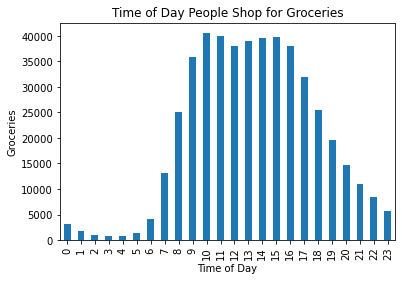

In [37]:
day_time_groceries= df_orders['order_hour_of_day'].value_counts().sort_index()
day_time_groceries.plot(kind='bar',title='Time of Day People Shop for Groceries', xlabel='Time of Day', ylabel='Groceries')

Looks like a lot of individuals shop for groceries mid-day. Based on the graph, going off of military time. 9AM to 4pm(16) is the time individuals shop for groceries. Seem likes at 5pm(17) it starts decreasing. 

### [A3] What day of the week do people shop for groceries?

<AxesSubplot:title={'center':'Day of the Week People Shop for Groceries'}, xlabel='Days', ylabel='Number of People'>

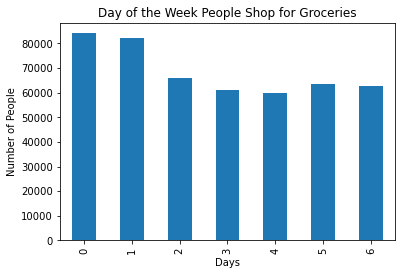

In [38]:
day_week_groceries= df_orders['order_dow'].value_counts().sort_index()
day_week_groceries.plot(kind='bar',title='Day of the Week People Shop for Groceries',ylabel='Number of People',xlabel='Days')

It seems pretty even, but the beggining of the week is a much busier time compared to the rest of the week. Mid week is when people are going the least. 

### [A4] How long do people wait until placing another order?

In [39]:
people_wait_groceries=df_orders['days_since_prior_order'].value_counts().sort_index()

<AxesSubplot:title={'center':'Days People Wait Until Placing Another Order'}, xlabel='Days', ylabel='Amount of Orders'>

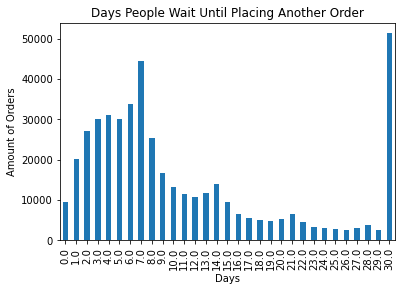

In [40]:
people_wait_groceries.plot(kind='bar',title='Days People Wait Until Placing Another Order',ylabel='Amount of Orders',xlabel='Days')

1-7 days is the most common for placing another order and it gets substantially less from there. Although, out of all the days, 30 days is by far the most popular to wait. 7 and 30 days are the most common. Basically, every week or every month.

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [41]:
df_oh_wednesday = df_orders[df_orders['order_dow']==3]
df_oh_saturday = df_orders[df_orders['order_dow']==6]

Text(0.5, 1.0, 'Wednesday')

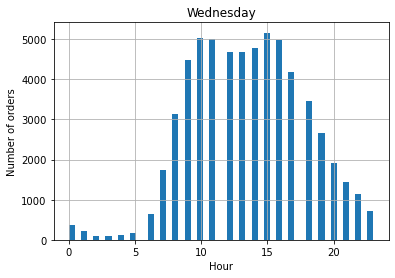

In [42]:
df_oh_wednesday['order_hour_of_day'].hist(bins=50)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.title('Wednesday')

Text(0.5, 1.0, 'Saturday')

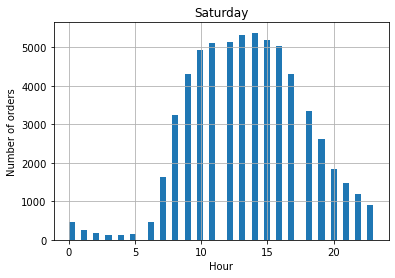

In [43]:
df_oh_saturday['order_hour_of_day'].hist(bins=50)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.title('Saturday')

Based on these results, there are more orders on Saturday. Although, what is similar is majority of the orders come from mid day. Pretty similar results into the evening.

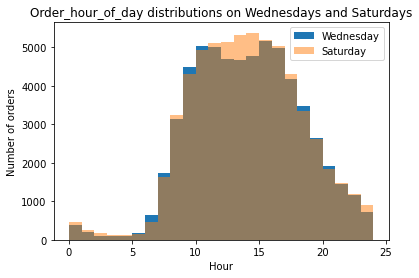

In [44]:
df_oh_wednesday['order_hour_of_day'].plot(kind='hist', bins=np.arange(0,25,1), label = 'Wednesday')
df_oh_saturday['order_hour_of_day'].plot(kind='hist', bins=np.arange(0,25,1), alpha=0.5, label = 'Saturday')

plt.title('Order_hour_of_day distributions on Wednesdays and Saturdays')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.show()

### [B2] What's the distribution for the number of orders per customer?

In [45]:
distribution_numbers = df_orders['user_id'].value_counts()
print(distribution_numbers)

149605    28
193164    26
78375     25
66664     24
134511    24
          ..
71501      1
187439     1
6845       1
176472     1
34561      1
Name: user_id, Length: 157437, dtype: int64


<AxesSubplot:ylabel='Frequency'>

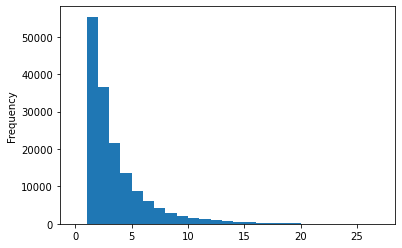

In [46]:
distribution_numbers.plot(kind='hist', bins=np.arange(0,distribution_numbers.max(),1))

Majority of customers mainly go into the store to buy 1-5 products. As the number of products get larger, the amount of customers that buy that specific total decreases. 

### [B3] What are the top 20 popular products (display their id and name)?

In [47]:
popular_products = df_order_products.merge(df_products, on='product_id')

In [48]:
popular_products = popular_products.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)
popular_products.head(20)

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
dtype: int64

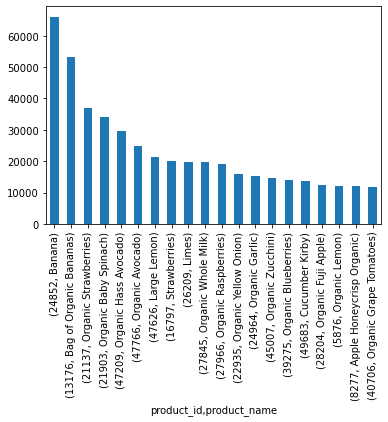

In [49]:
popular_products.head(20).plot.bar()
plt.show()

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [50]:
one_order = df_order_products.groupby('order_id')['product_id'].nunique()
print(one_order)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64


In [51]:
one_order = one_order.value_counts()
print(one_order.sort_index())

1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: product_id, Length: 90, dtype: int64


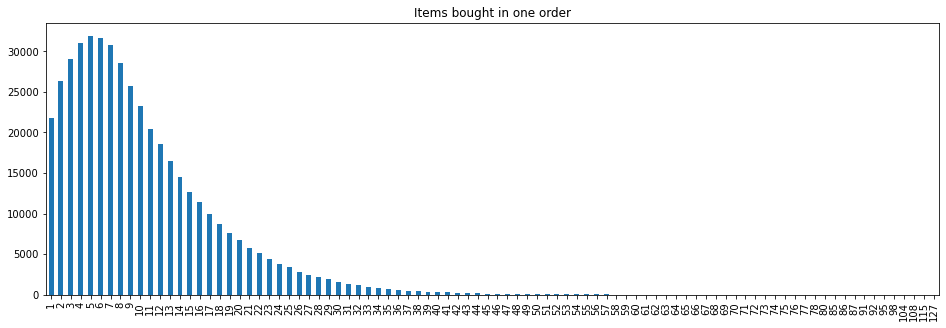

In [52]:
one_order.sort_index().plot(kind='bar',title="Items bought in one order", figsize=(16,5));

The number of items bought in one order peaks at 4-5.6 is when we start the # of orders start dropping off. We dont see many buy 30+ orders. These individuals could be businesses, large groups, large families. 

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [53]:
top_t_re = df_order_products.merge(df_products,on='product_id')
print(top_t_re)

         order_id  product_id  add_to_cart_order  reordered  \
0         2141543       11440                 17          0   
1          147172       11440                  7          1   
2         3341719       11440                  4          1   
3         1938779       11440                  8          1   
4         1728338       11440                 23          0   
...           ...         ...                ...        ...   
4545002    267402       45226                 14          0   
4545003   2621676       25201                 10          0   
4545004    937623       49153                  2          0   
4545005    532895        8182                  1          0   
4545006   3132243       40024                  1          0   

                               product_name  aisle_id  department_id  
0            Chicken Breast Tenders Breaded       129              1  
1            Chicken Breast Tenders Breaded       129              1  
2            Chicken Breast Te

In [54]:
top_t_re= top_t_re.dropna()
print(top_t_re)

         order_id  product_id  add_to_cart_order  reordered  \
0         2141543       11440                 17          0   
1          147172       11440                  7          1   
2         3341719       11440                  4          1   
3         1938779       11440                  8          1   
4         1728338       11440                 23          0   
...           ...         ...                ...        ...   
4545002    267402       45226                 14          0   
4545003   2621676       25201                 10          0   
4545004    937623       49153                  2          0   
4545005    532895        8182                  1          0   
4545006   3132243       40024                  1          0   

                               product_name  aisle_id  department_id  
0            Chicken Breast Tenders Breaded       129              1  
1            Chicken Breast Tenders Breaded       129              1  
2            Chicken Breast Te

In [55]:
top_t_re = top_t_re.groupby(['product_id','product_name'])['reordered'].count()
print(top_t_re)

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           280
2           All-Seasons Salt                                                      11
3           Robust Golden Unsweetened Oolong Tea                                  42
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce     49
7           Pure Coconut Water With Orange                                         2
                                                                                ... 
49690       HIGH PERFORMANCE ENERGY DRINK                                          5
49691       ORIGINAL PANCAKE & WAFFLE MIX                                         72
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                       12
49693       SPRING WATER BODY WASH                                                25
49694       BURRITO- STEAK & CHEESE                                     

In [56]:
print(top_t_re.sort_values(ascending=False).head(20))

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: reordered, dtype: int64
